<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset in the csv file from the URL


In [21]:
df=pd.read_csv("boston_housing.csv")

#### Add your code below following the instructions given in the course to complete the peer graded assignment


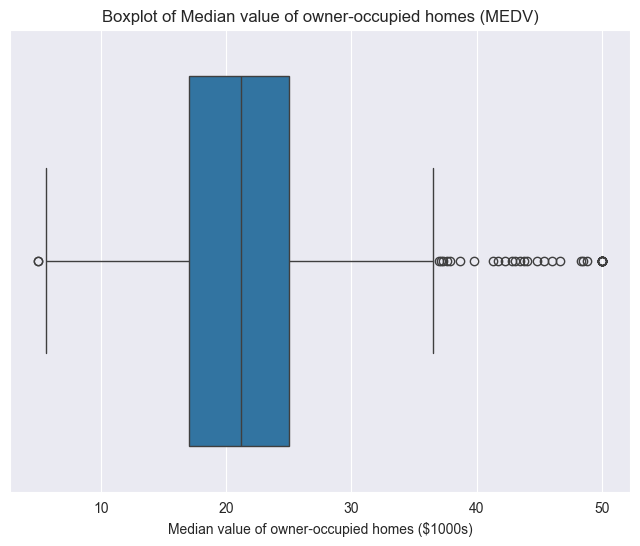

In [22]:
# Boxplot for Median value of owner-occupied homes (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('Median value of owner-occupied homes ($1000s)')
plt.show()

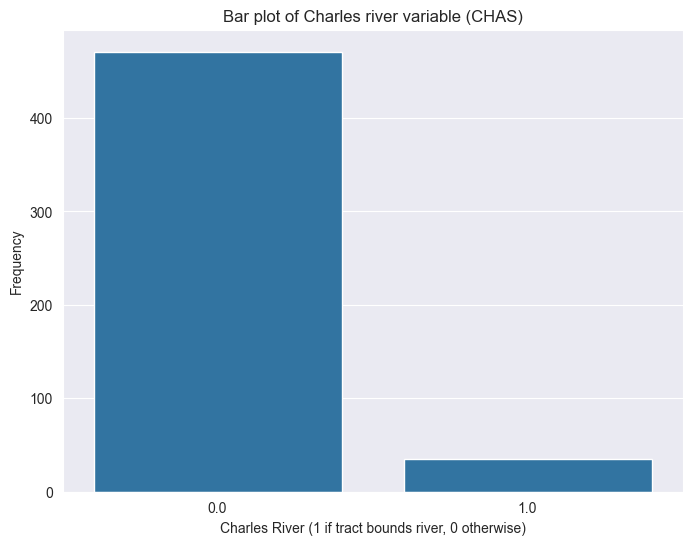

In [23]:
# Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar plot of Charles river variable (CHAS)')
plt.xlabel('Charles River (1 if tract bounds river, 0 otherwise)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Discretize the AGE variable
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

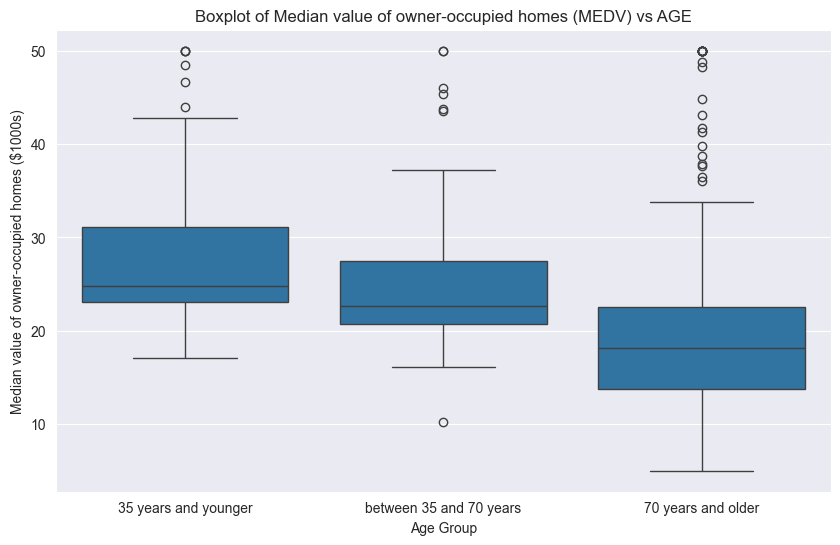

In [25]:
# Boxplot for MEDV vs AGE
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=df)
plt.title('Boxplot of Median value of owner-occupied homes (MEDV) vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.show()

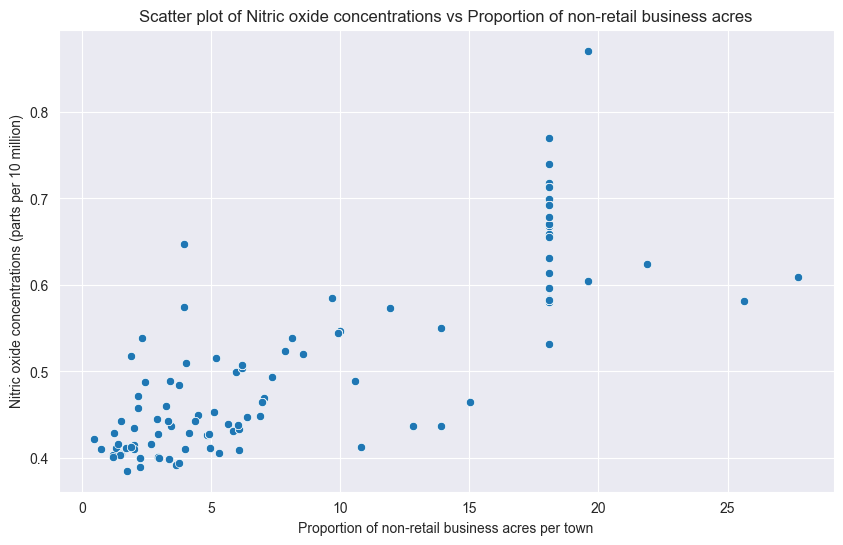

In [26]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter plot of Nitric oxide concentrations vs Proportion of non-retail business acres')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations (parts per 10 million)')
plt.show()

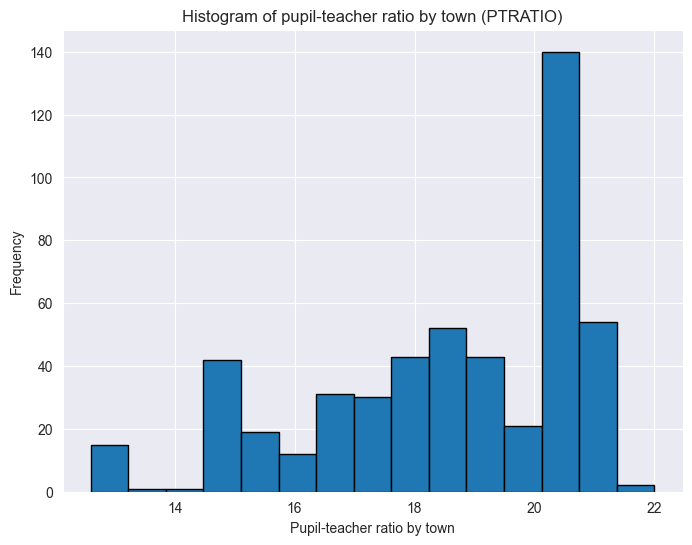

In [27]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(df['PTRATIO'], bins=15, edgecolor='black')
plt.title('Histogram of pupil-teacher ratio by town (PTRATIO)')
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Frequency')
plt.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.
Test Statistic: Independent samples t-test

α = 0.05

In [28]:
from scipy.stats import ttest_ind

# Extract MEDV values for houses bounded and not bounded by Charles river
medv_bounded = df[df['CHAS'] == 1]['MEDV']
medv_not_bounded = df[df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(medv_bounded, medv_not_bounded)

print("T-test statistic:", t_statistic)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in median values of houses bounded by Charles river and those not bounded by Charles river.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in median values of houses bounded by Charles river and those not bounded by Charles river.")

T-test statistic: 3.996437466090509
P-value: 7.390623170519902e-05
Reject null hypothesis: There is a significant difference in median values of houses bounded by Charles river and those not bounded by Charles river.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).
Alternative Hypothesis (H1): There is a significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).
Test Statistic: One-way ANOVA

α = 0.05

In [29]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(df[df['AGE_group'] == '35 years and younger']['MEDV'],
                                df[df['AGE_group'] == 'between 35 and 70 years']['MEDV'],
                                df[df['AGE_group'] == '70 years and older']['MEDV'])

print("ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")


ANOVA F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject null hypothesis: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
Test Statistic: Pearson correlation coefficient

α = 0.05

In [33]:
# Calculate Pearson correlation coefficient
correlation_coefficient = df['NOX'].corr(df['INDUS'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Pearson correlation coefficient: 0.7636514469209152
P-value: 1.7105011022702984e-15
Reject null hypothesis: There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
Regression Analysis: Multiple linear regression

α = 0.05

In [34]:
import statsmodels.api as sm

# Define independent and dependent variables
X = df[['DIS']] # Weighted distances to five Boston employment centres
y = df['MEDV'] # Median value of owner-occupied homes

# Add constant to independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        17:24:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0